In [51]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [52]:
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [53]:
import kagglehub

path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [54]:
csv_file = os.path.join(path, "Mall_Customers.csv")
df = pd.read_csv(csv_file)

print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Problem statement



*   Retail Mall - want to understand the customers better
* Task: Make use of Unsupervised Learning algorithms (mainly Clustering) to segment the customers into meaningful groups



# Data Exploration and Cleaning

In [55]:
df.info() #Overall Summary - columns with data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [56]:
df.describe() #Descriptive Statistics -> numerical columns

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [57]:
df.nunique() #Unique values in each column

,0
CustomerID,200
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


In [58]:
df.isnull().sum() #Checking missing values

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [59]:
df = df.drop(['CustomerID'], axis = 1) # Removing CustomerID before checking duplicate rpws

df.duplicated().sum() > 0 #Checking the duplicates

np.False_

In [60]:
# df.drop_duplicates(keep = )

In [61]:
# Renaming the columns

df.rename(columns = {'Annual Income (k$)':'Annual_Income',
                     'Spending Score (1-100)': 'Spending_Score'}, inplace = True)

In [62]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [63]:
# Encode Gender -> Male -1, Female - 0

df['Gender'] = df['Gender'].map({'Male': 1 , 'Female': 0})
df.head(3)

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


# EDA
*  Univariate Analysis - histogram with kde / box plot for Outliers
*  Bivariate Analysis - scatter plot
*  Multi-variate - heatmap



<Axes: xlabel='Age', ylabel='Count'>

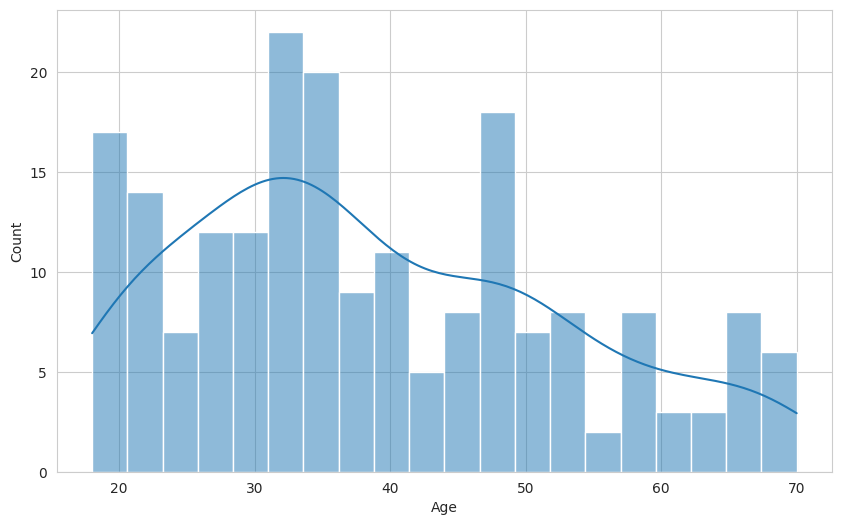

In [64]:
# Plot histogram for every numerical column

sns.histplot(data = df, x = 'Age', bins = 20, kde = True)

<Axes: xlabel='Annual_Income', ylabel='Count'>

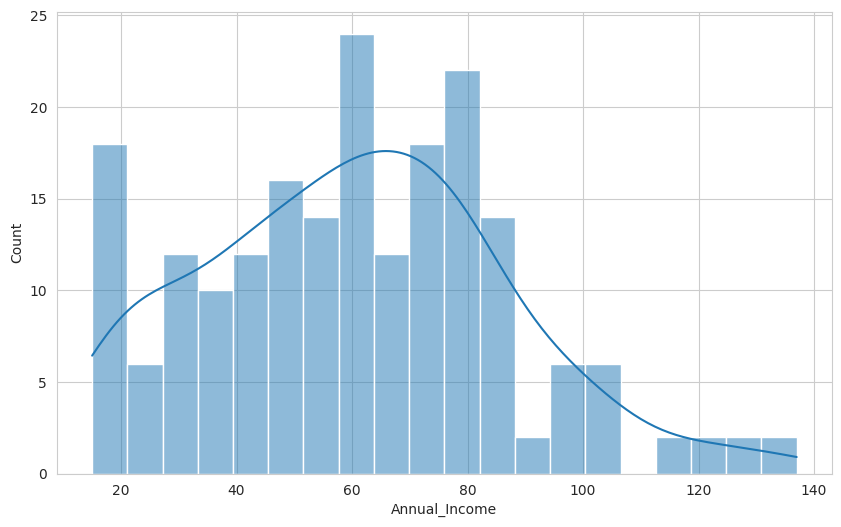

In [65]:
sns.histplot(data = df, x = 'Annual_Income', bins = 20, kde = True)

<Axes: xlabel='Spending_Score', ylabel='Count'>

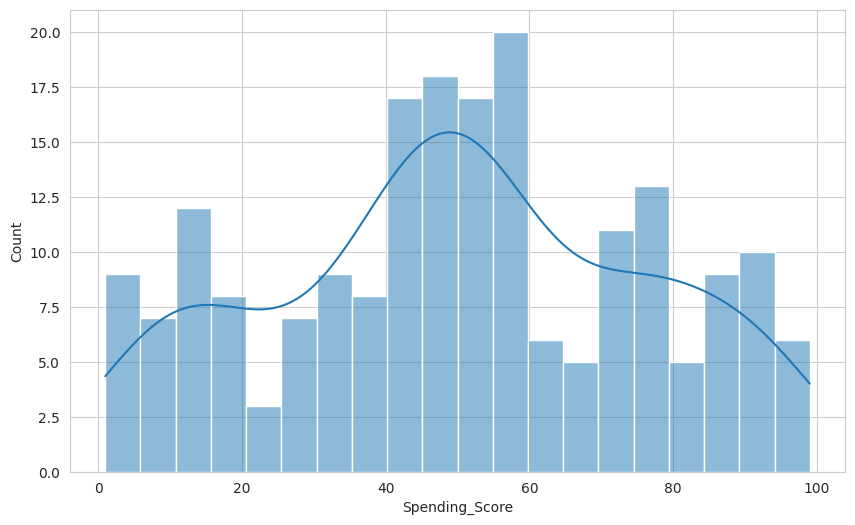

In [66]:
sns.histplot(data = df, x = 'Spending_Score', bins = 20, kde = True)

# Homework - plot mean and median lines on the above histogram plots

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

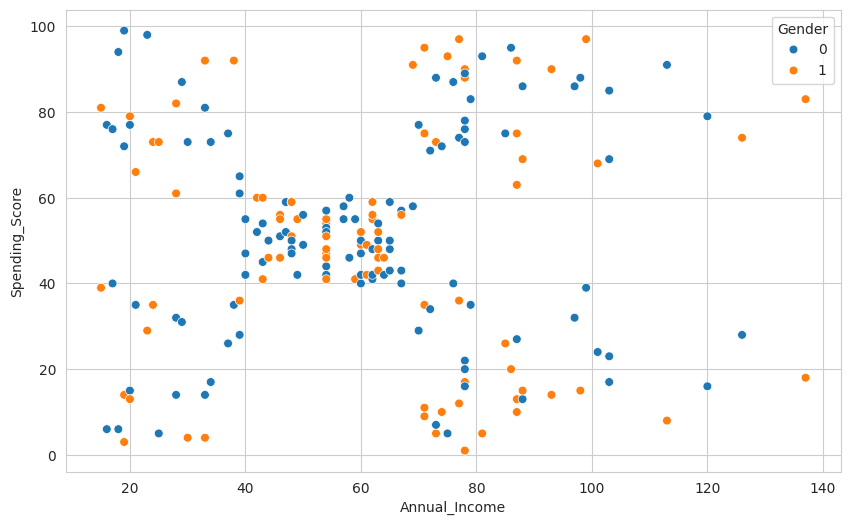

In [67]:
# Bivariate Analysis

# Plot scatter plots for all pairs of numerical columns


sns.scatterplot(data = df, x = 'Annual_Income', y = 'Spending_Score', s=40, hue= 'Gender')

<Axes: xlabel='Age', ylabel='Spending_Score'>

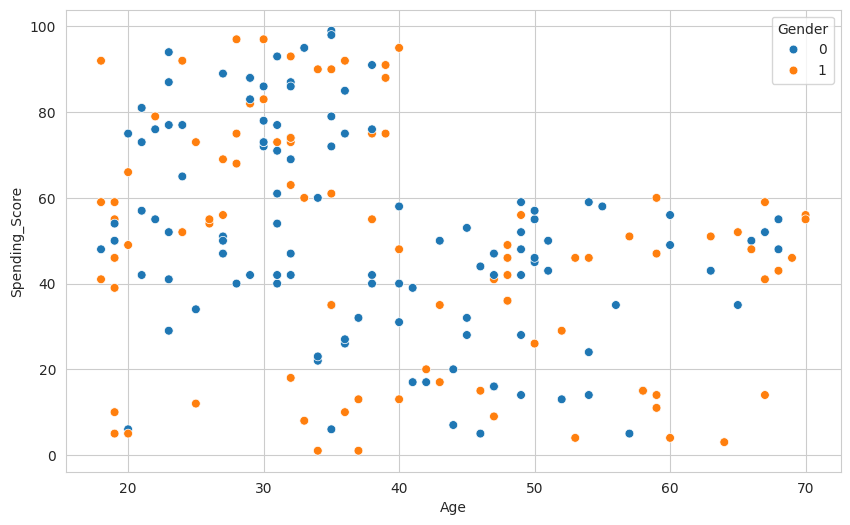

In [68]:
sns.scatterplot(data = df, x = 'Age', y = 'Spending_Score', s=40, hue= 'Gender')

<Axes: xlabel='Age', ylabel='Annual_Income'>

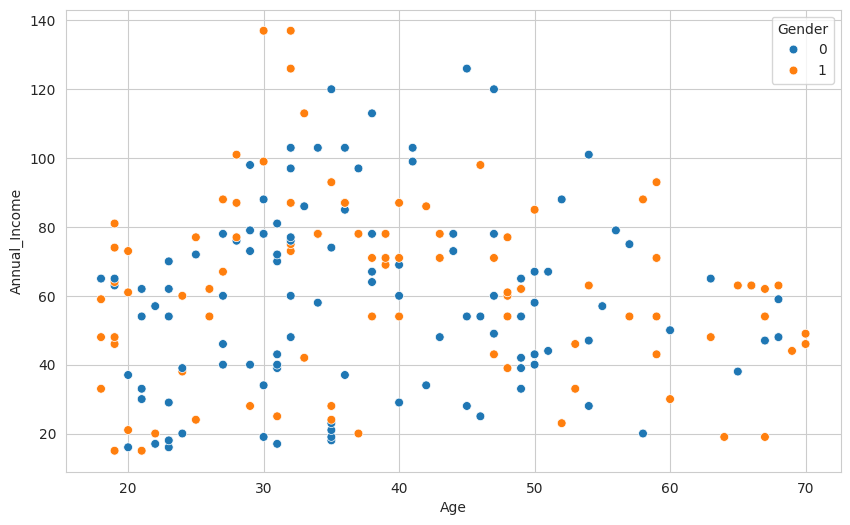

In [69]:
sns.scatterplot(data = df, x = 'Age', y = 'Annual_Income', s=40, hue= 'Gender')

<Axes: >

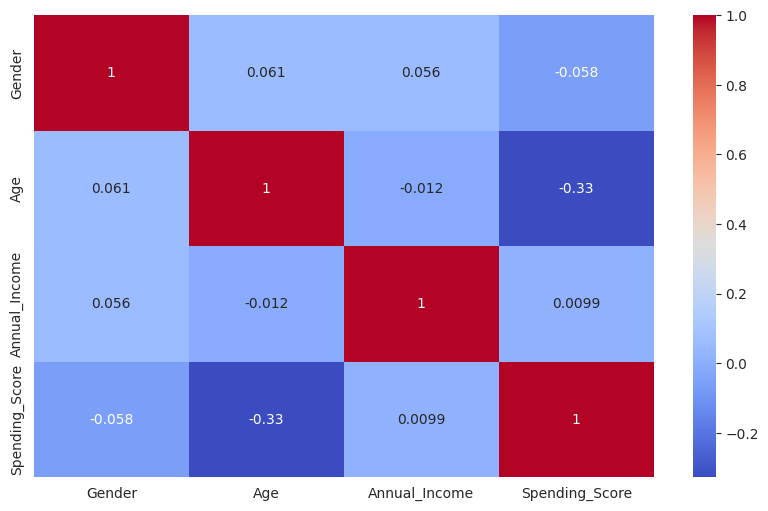

In [70]:
# Multivariate Analysis

correlation = df.corr()
# Values are usually between -1 and 1
# 1 -> positive correlation
# -1 -> negative correaltion
# 0 -> no correlation

sns.heatmap(correlation, cmap='coolwarm', annot = True)

# Dimensionality Reduction

In [71]:


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the features
# Intitalize PCA -> n_components = 2
# Transfor the Data
# Calculate explained_variance_ratio

In [72]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Initialize PCA -> 2 components
pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(df_scaled)

# Calculate expalined-variance-ratio
print(pca.explained_variance_ratio_)

# Plot a scatter plot - PC1 vs PC2

[0.33690046 0.26230645]


In [73]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


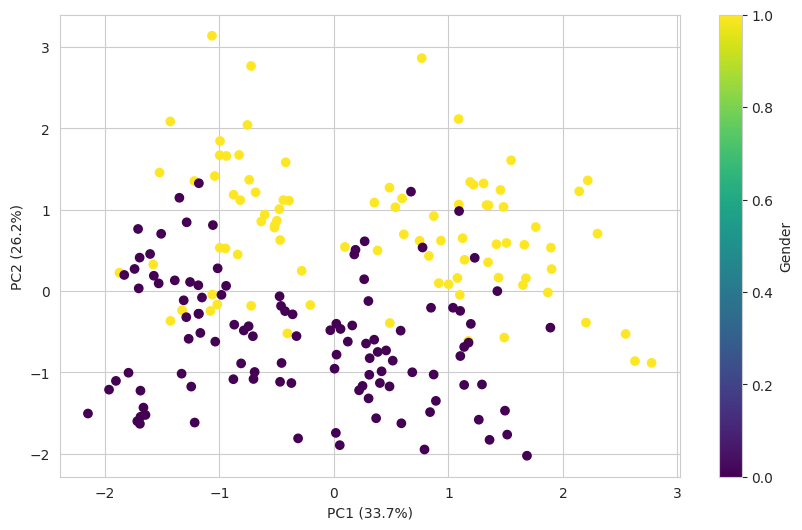

In [74]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Gender'], cmap='viridis')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
plt.colorbar(label='Gender')
plt.show()

In [75]:
# For better visualizations in lower dimension -> tSNE